In [1]:
cd /data/store01/data_dirs/students/ucfafyi/S2_MODIS

/data/store01/data_dirs/students/ucfafyi/S2_MODIS


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *

In [3]:
from Aerosol_solving import *

In [64]:
[i[0][0] for i in parallel_rw_pkl(None, '31UCU_PSF', 'r')]

[array([ 30.05294918,  39.23884573, -15.        ,  38.37466874,  36.08948403]),
 array([ 28.42189703,  46.16687582, -14.35184779,  33.52740496,  36.66205841]),
 array([ 28.9732921 ,  38.67458231, -11.01738003,  33.85948106,  34.60925541]),
 array([ 29.26439027,  41.06747199, -15.        ,  36.4876675 ,  38.60321191]),
 array([ 32.25386058,  44.54136249, -10.23075598,  36.54272096,  34.07948522])]

In [30]:
aot_sol = Aerosol_retrival(S2_fname='31UCU',\
                           lat=52.607756, lon = 0.861739, S2_day=25, S2_month=3,\
                           S2_psf=[  32.25386058,  44.54136249, -10.23075598,  36.54272096,  34.07948522], year=2016)
aot, wv= aot_sol.S2_aot()
sr = aot_sol.S2_cor()

Saving surface reflectance....


In [6]:
%matplotlib inline
import pylab as plt

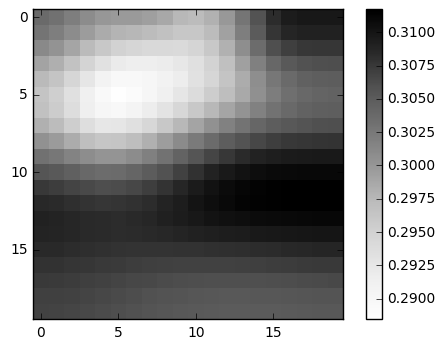

In [31]:
plt.imshow(aot, interpolation='None',cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()

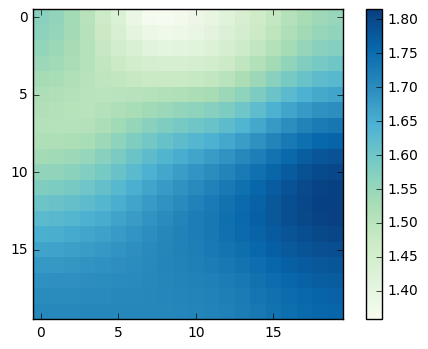

In [32]:
plt.imshow(wv, interpolation='None', cmap=plt.cm.get_cmap('GnBu'))
plt.colorbar()

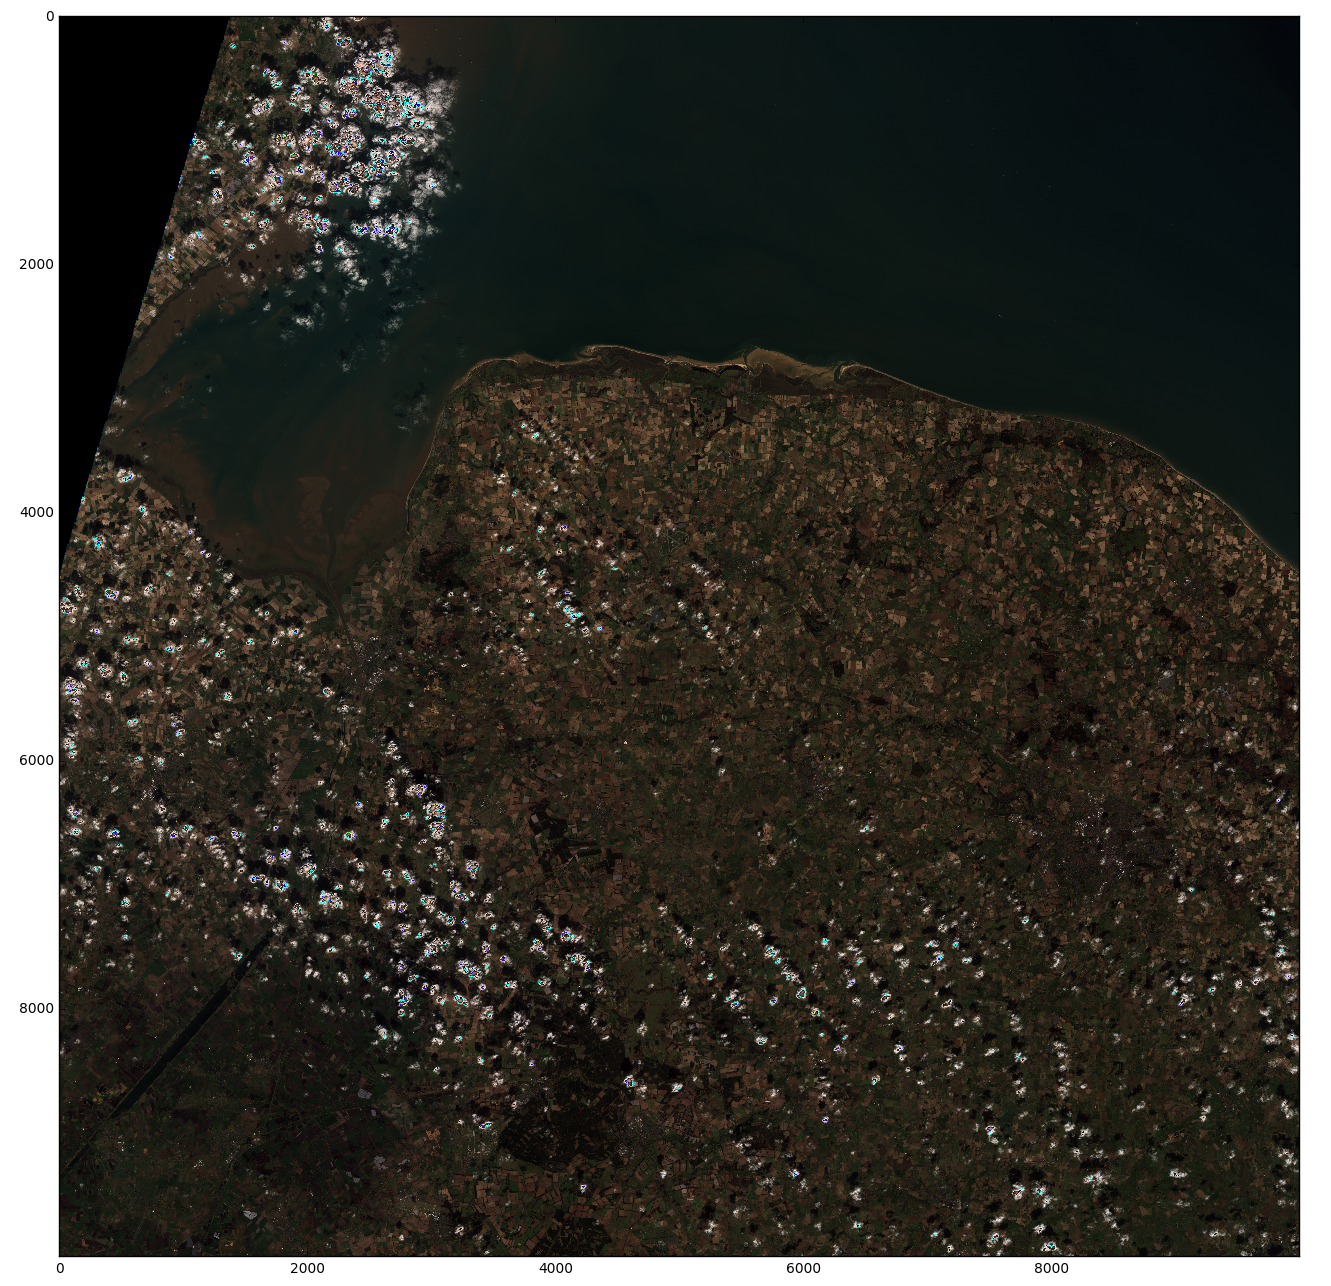

In [33]:
plt.figure(figsize=(16,16))
plt.imshow(np.array([sr[2], sr[1], sr[0]]).transpose(1,2,0)*2,interpolation='None')
plt.savefig('image/%s_%02d_%02d.pdf'%(aot_sol.S2_fname, aot_sol.S2_month, aot_sol.S2_day), dpi=400)

In [34]:
aoi= np.array([gdal.Open(aot_sol.Hfile+'%s.jp2'%band).ReadAsArray()*0.0001 for band in aot_sol.bands[:3]]).transpose(1,2,0)

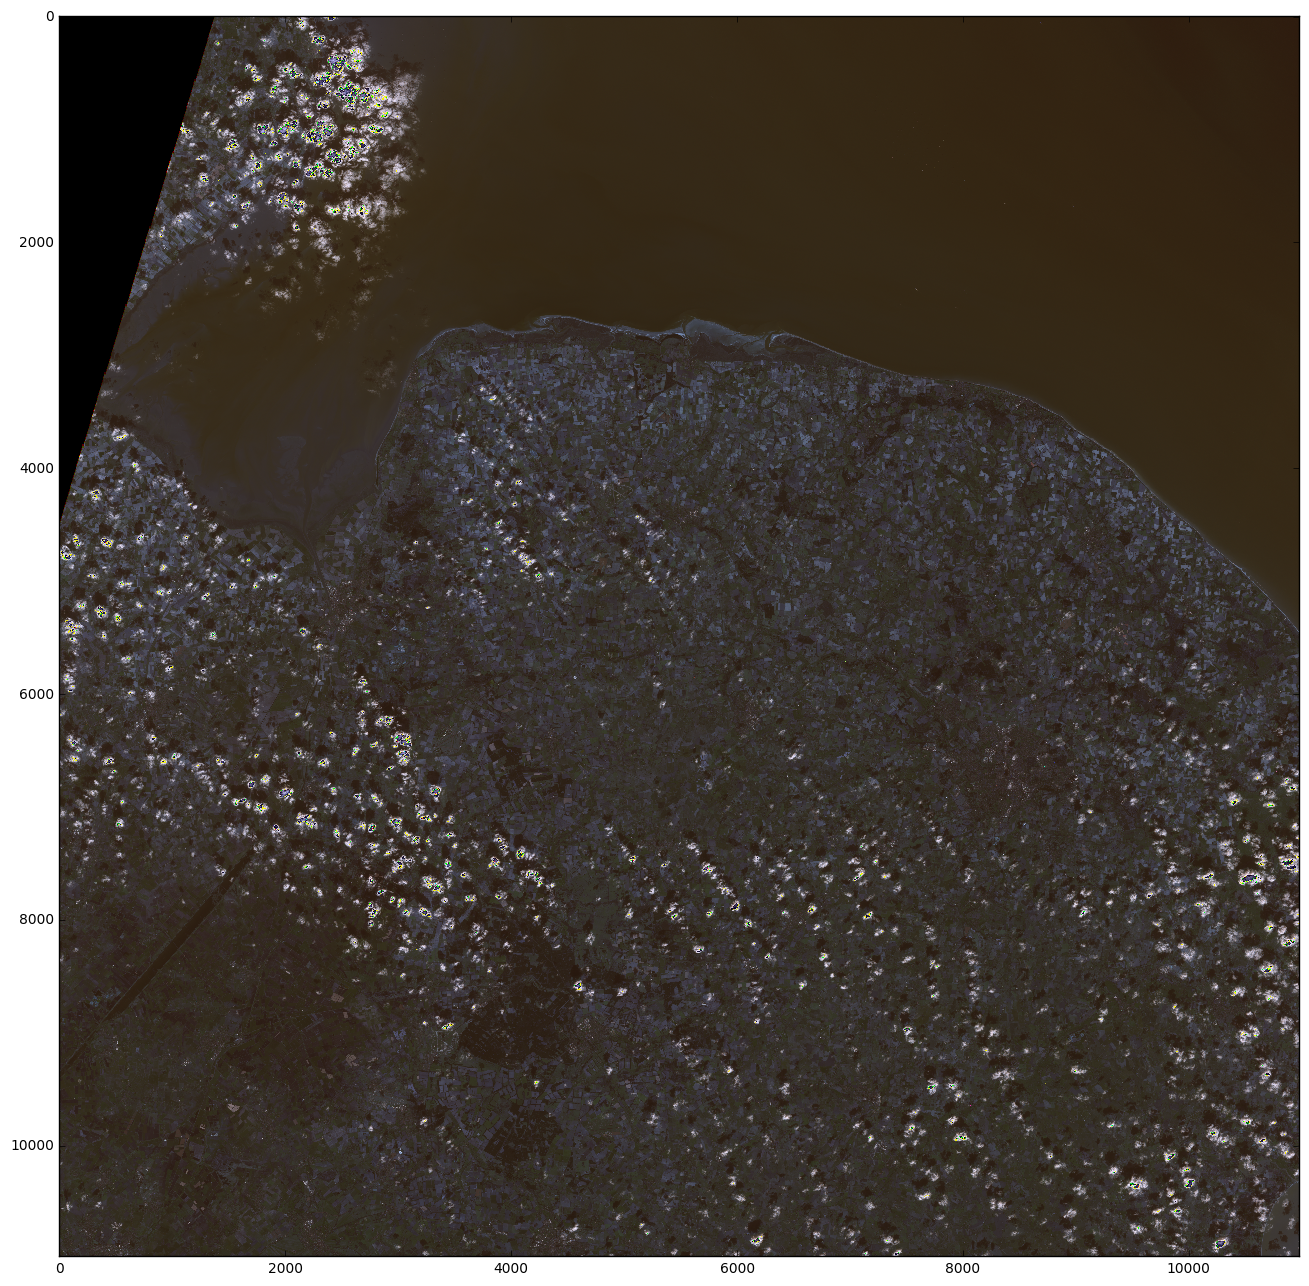

In [35]:
plt.figure(figsize=(16,16))
plt.imshow(aoi*2,interpolation='None')
plt.savefig('%s_%02d_%02d_toa.pdf'%(aot_sol.S2_fname, aot_sol.S2_month, aot_sol.S2_day), dpi=400)